In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime
from dateutil.relativedelta import relativedelta
import random

#default colors
colors_ = ('viridis(np.linspace(0, 1, 12))', plt.cm.viridis(np.linspace(0, 1, 7)))[1]


## Data Import
All necessary file links and merged data can be accessed through the TSD.py file. All TSD data frames use the prefix "df_" and can be located using auto complete by entering "TSD.df_"

In [2]:
import TSD

### Initial Look at Data
A quick print out of the merged data reveals the following:

In [3]:
merged_df = TSD.df_merged
merged_df.head()


,id,dob,gender,city,colonia,state_x,id_x,timein,timeout,state_y,clinic_id,patient_id,id_y,location,start,end
0,1,2005-08-09,f,punta colonet,NaN,BC,588,2021-05-07 09:44:49.715394,2021-05-07 09:44:49.715421,i,15,1,15,Thousand Smiles Ensenada,2021-05-01,2021-05-11
1,1,2005-08-09,f,punta colonet,NaN,BC,607,2021-08-06 09:47:35.775716,2021-08-06 09:47:35.775741,i,16,1,16,Thousand Smiles Ensenada,2021-08-01,2021-08-08
2,1,2005-08-09,f,punta colonet,NaN,BC,733,2022-05-06 10:01:49.350689,2022-05-06 10:01:49.350714,i,23,1,23,Ensenada,2022-05-06,2022-05-08
3,1,2005-08-09,f,punta colonet,NaN,BC,1049,2022-11-04 10:19:36.302828,2022-11-04 10:19:36.302844,i,25,1,25,Ensenada,2022-11-04,2022-11-06
4,1,2005-08-09,f,punta colonet,NaN,BC,1153,2023-02-03 08:59:22.584125,2023-02-03 08:59:22.584141,i,30,1,30,Ensenada,2023-02-03,2023-02-05


### Basic Stats - Population
Some basic charts showing the makeup of the population using Thousand Smiles Clinics in the given time period.

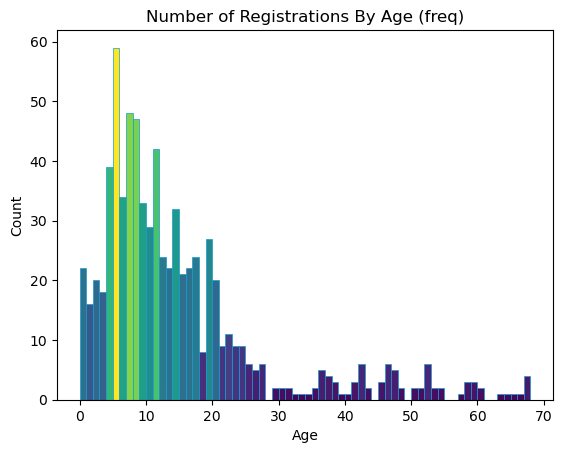

In [4]:
def compute_age(row):
    d1 = datetime.strptime(row["start"], "%Y-%m-%d")
    d2 = datetime.strptime(row["dob"], "%Y-%m-%d")
    diff_in_years = relativedelta(d1, d2)
    return diff_in_years.years

merged_df["age_in_years"] = merged_df.apply(lambda row: compute_age(row), axis=1)

age_row = merged_df["age_in_years"]
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
plt.style.use('seaborn-whitegrid') # nice and clean grid
n, bins, patches = axes1.hist(data = merged_df, x='age_in_years', facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5, bins = int(merged_df["age_in_years"].max()))

axes1.set_title("Number of Registrations By Age (freq)", fontsize=12)
axes1.set_xlabel("Age", fontsize = 10)
axes1.set_ylabel("Count", fontsize = 10)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
plt.show()



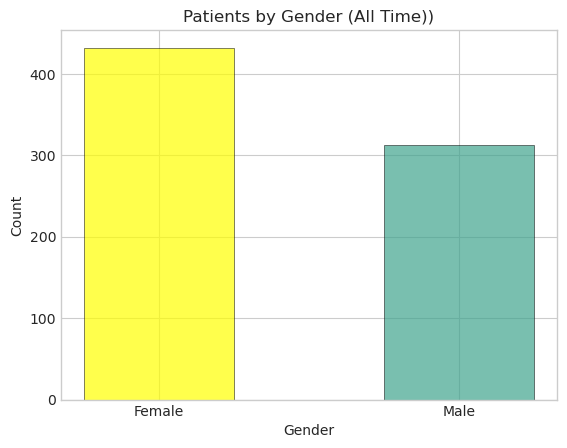

In [5]:
di = {'m': "Male", 'f': "Female"}
merged_df = merged_df.replace({"gender": di})


gender_row = merged_df["gender"]
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
plt.style.use('seaborn-whitegrid') # nice and clean grid
n, bins, patches = axes1.hist(data = merged_df, x='gender', facecolor = '#2ab0ff'
                              , edgecolor='black', linewidth=0.5, bins = 2, align = 'mid', 
                                rwidth= 0.5)

axes1.set_title("Patients by Gender (All Time))", fontsize=12)
axes1.set_xlabel("Gender", fontsize = 10)
axes1.set_ylabel("Count", fontsize = 10)
patches[1].set_facecolor('#40a48e')
patches[0].set_facecolor('yellow')

patches[0].set_alpha(0.7)
patches[1].set_alpha(0.7)

ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
ticklabels = ['Female','Male']
plt.xticks(ticks, ticklabels)

plt.show()

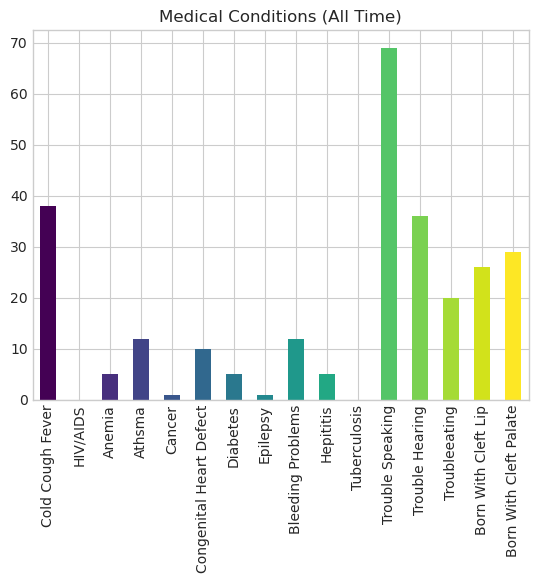

In [6]:
med_srs = TSD.df_medical[["cold_cough_fever", "hivaids", "anemia", "athsma", "cancer", "congenitalheartdefect", "diabetes", "epilepsy", "bleeding_problems", "hepititis", "tuberculosis", "troublespeaking", "troublehearing", "troubleeating", "born_with_cleft_lip", "born_with_cleft_palate"]].sum()
index_ = ["Cold Cough Fever", "HIV/AIDS", "Anemia", "Athsma",
            "Cancer", "Congenital Heart Defect", "Diabetes", "Epilepsy",
            "Bleeding Problems", "Hepititis", "Tuberculosis", "Trouble Speaking",
            "Trouble Hearing", "Troubleeating", "Born With Cleft Lip", 
             "Born With Cleft Palate"]
med_srs.index = index_

colors_2 = ('viridis(np.linspace(0, 1, 12))', plt.cm.viridis(np.linspace(0, 1, len(med_srs))))[1]
med_srs.plot.bar(color=colors_2) 

plt.title("Medical Conditions (All Time)")
    

plt.show()



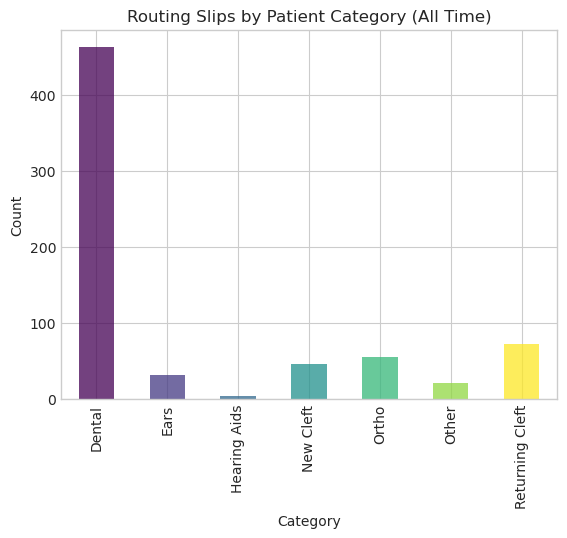

In [7]:
TSD.df_routing['category'].value_counts().sort_index().plot.bar(alpha=0.75, color=colors_)
plt.title("Routing Slips by Patient Category (All Time)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()



In [8]:
merged_df.describe()

,id,id_x,clinic_id,patient_id,id_y,age_in_years
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,438.540940,951.000000,24.868456,438.540940,24.868456,14.542282
std,175.678497,215.207264,4.776048,175.678497,4.776048,13.320537
min,1.000000,579.000000,14.000000,1.000000,14.000000,0.000000
25%,343.000000,765.000000,23.000000,343.000000,23.000000,6.000000
50%,440.000000,951.000000,25.000000,440.000000,25.000000,11.000000
75%,582.000000,1137.000000,30.000000,582.000000,30.000000,18.000000
max,721.000000,1323.000000,34.000000,721.000000,34.000000,68.000000


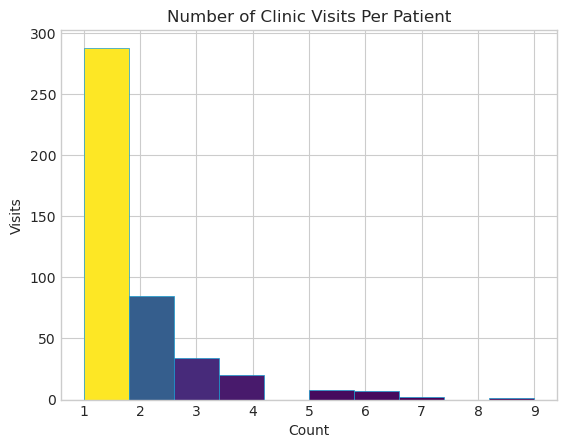

In [9]:
count_df = TSD.df_merged.groupby("patient_id").count();
##count_df["id"].plot(kind='hist', edgecolor='k', alpha=0.75, rot=0)
'''
plt.title("Number of Clinic Visits Per Patient")
plt.xlabel("Count")
plt.ylabel("Visits")
plt.show()
'''
count_row = count_df["id"]
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
plt.style.use('seaborn-whitegrid') # nice and clean grid
n, bins, patches = axes1.hist(data =count_df, x='id', align="mid", facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)

axes1.set_title("Number of Clinic Visits Per Patient", fontsize=12)
axes1.set_xlabel("Count", fontsize = 10)
axes1.set_ylabel("Visits", fontsize = 10)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
plt.show()

### Basic Stats - Clinics

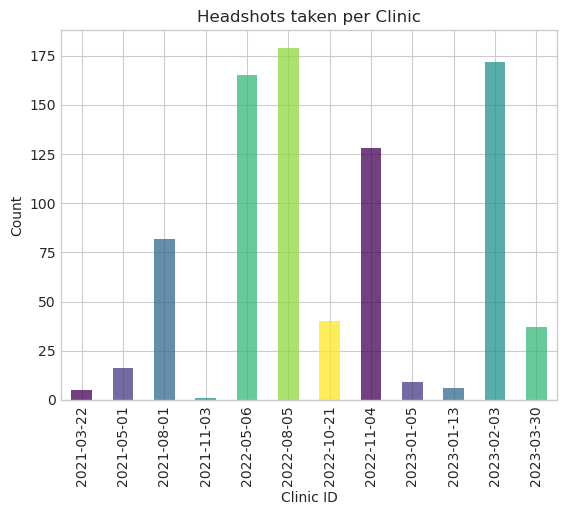

In [10]:
TSD.df_headshot['clinic_id'].value_counts().sort_index().plot(kind='bar', alpha=0.75, color = colors_)
plt.title("Headshots taken per Clinic")
plt.xlabel("Clinic ID")
plt.ylabel("Count")
plt.show()

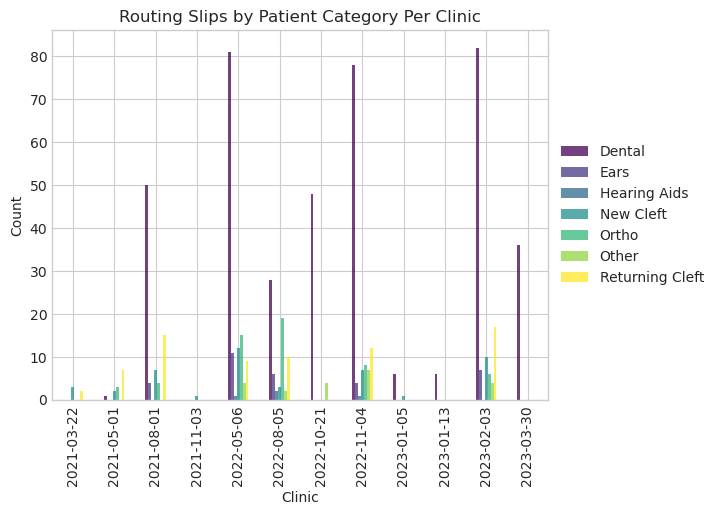

In [11]:
TSD.df_routing.groupby(["clinic_id", "category"]).size().unstack().plot(kind="bar", alpha=0.75, color=colors_).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

plt.title("Routing Slips by Patient Category Per Clinic")
plt.xlabel("Clinic")
plt.ylabel("Count")
plt.show()

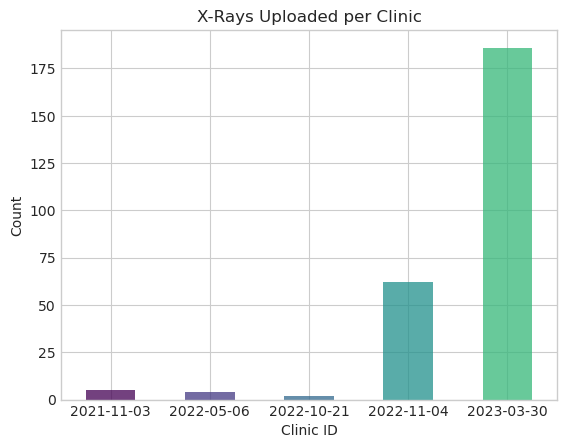

In [12]:
TSD.df_xray['clinic_id'].value_counts().sort_index().plot(kind='bar', alpha=0.75, color=colors_, rot=0)
plt.title("X-Rays Uploaded per Clinic")
plt.xlabel("Clinic ID")
plt.ylabel("Count")
plt.show()

### Information on the Data
The following gives information on the data itself.

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 744
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            745 non-null    int64 
 1   dob           745 non-null    object
 2   gender        745 non-null    object
 3   city          708 non-null    object
 4   colonia       669 non-null    object
 5   state_x       745 non-null    object
 6   id_x          745 non-null    int64 
 7   timein        745 non-null    object
 8   timeout       745 non-null    object
 9   state_y       745 non-null    object
 10  clinic_id     745 non-null    int64 
 11  patient_id    745 non-null    int64 
 12  id_y          745 non-null    int64 
 13  location      745 non-null    object
 14  start         745 non-null    object
 15  end           745 non-null    object
 16  age_in_years  745 non-null    int64 
dtypes: int64(6), object(11)
memory usage: 104.8+ KB


In [14]:
merged_df.nunique()

id              445
dob             429
gender            2
city             55
colonia         284
state_x           3
id_x            745
timein          745
timeout         745
state_y           1
clinic_id        12
patient_id      445
id_y             12
location          2
start            12
end              12
age_in_years     62
dtype: int64

#### Potential Problems
Are there any missing values?

In [15]:
merged_df.isna().sum()

id               0
dob              0
gender           0
city            37
colonia         76
state_x          0
id_x             0
timein           0
timeout          0
state_y          0
clinic_id        0
patient_id       0
id_y             0
location         0
start            0
end              0
age_in_years     0
dtype: int64

Are there any duplicate values? (id_x represents unique visit)

In [16]:
merged_df.duplicated(subset=['id_x']).sum()

0